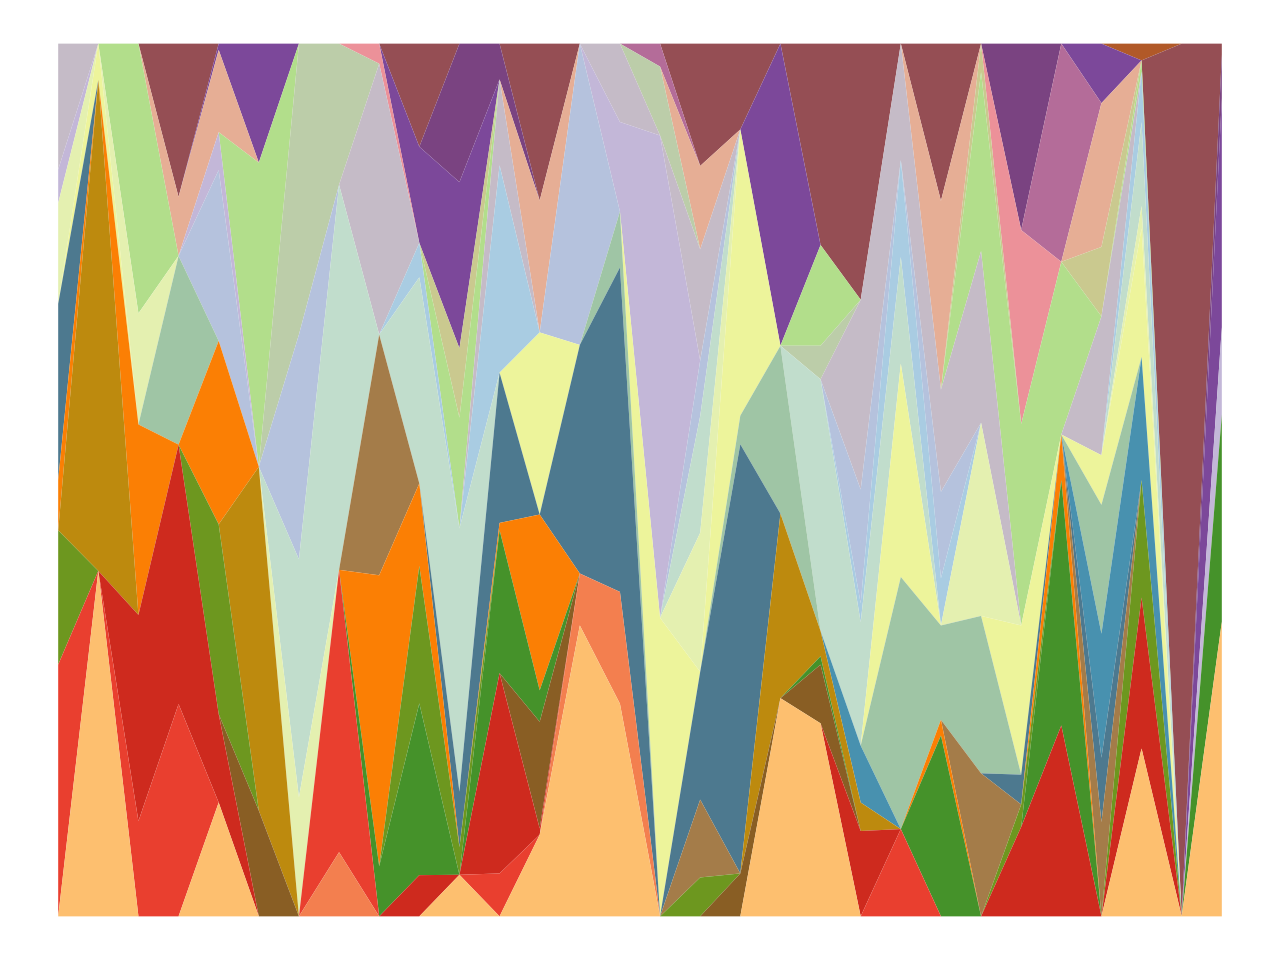

In [1]:
import polars as pl
import numpy as np

from plotnine import *
from mizani.palettes import brewer_pal, gradient_n_pal

np.random.seed(345678)

# generate random areas for each group to fill per year ---------
# Note that in the data the x-axis is called Year, and the
# filled bands are called Group(s)

opts = [0] * 100 + list(range(1, 31))
values = []
for ii in range(30):
    values.extend(np.random.choice(opts, 30, replace=False))


# Put all the data together -------------------------------------
years = pl.DataFrame({"Year": list(range(30))})
groups = pl.DataFrame({"Group": [f"grp_{ii}" for ii in range(30)]})

df = (
    years.join(groups, how="cross")
    .with_columns(Values=pl.Series(values))
    .with_columns(prop=pl.col("Values") / pl.col("Values").sum().over("Year"))
)

df.write_csv("plot-data.csv")

# Generate color palette ----------------------------------------
# this uses 12 colors interpolated to all 30 Groups
pal = brewer_pal("qual", "Paired")

colors = pal(12)
np.random.shuffle(colors)

all_colors = gradient_n_pal(colors)(np.linspace(0, 1, 30))


# Plot ---------------------------------------------------------
(
    df
    >> ggplot(aes("Year", "prop", fill="Group"))
    + geom_area()
    + scale_fill_manual(values=all_colors)
    + theme(
        axis_text=element_blank(),
        line=element_blank(),
        title=element_blank(),
        legend_position="none",
        plot_margin=0,
        panel_border=element_blank(),
        panel_background=element_blank(),
    )
)